In [2]:
pip install keras-tcn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Cell 1: Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Cell 2: Loading the dataset
file_path = "C:/jupyter notebook files/final_project/GlobalWeatherRepository.csv"
df = pd.read_csv(file_path)
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [5]:
# Cell 3: Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Fill missing values if any
df = df.fillna(method='ffill')  # Forward fill missing values

# Convert 'last_updated' column to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Set 'last_updated' as the index
df.set_index('last_updated', inplace=True)

# Display the first few rows of the dataframe
df.head()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

C:\Users\Sayan\AppData\Local\Temp\ipykernel_2852\382128891.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values


,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,26.6,79.8,Partly Cloudy,8.3,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
2024-05-16 10:45:00,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,19.0,66.2,Partly cloudy,6.9,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2024-05-16 09:45:00,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,23.0,73.4,Sunny,9.4,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
2024-05-16 10:45:00,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,6.3,43.3,Light drizzle,7.4,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
2024-05-16 09:45:00,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,26.0,78.8,Partly cloudy,8.1,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  47162.000000  47162.000000        4.716200e+04         47162.000000   
mean      19.143012     22.209506        1.726357e+09            23.242977   
std       24.482099     65.783877        6.112758e+06             9.016761   
min      -41.300000   -175.200000        1.715849e+09           -24.800000   
25%        3.750000     -6.250000        1.720963e+09            18.400000   
50%       17.250000     23.320000        1.726402e+09            25.400000   
75%       40.400000     50.580000        1.731661e+09            29.000000   
max       64.150000    179.220000        1.736855e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            47162.000000  47162.000000  47162.000000  47162.000000   
mean                73.838777      8.305225     13.369927    171.318010   
std                 16.230117      9.991996     16.079441    103.029295 

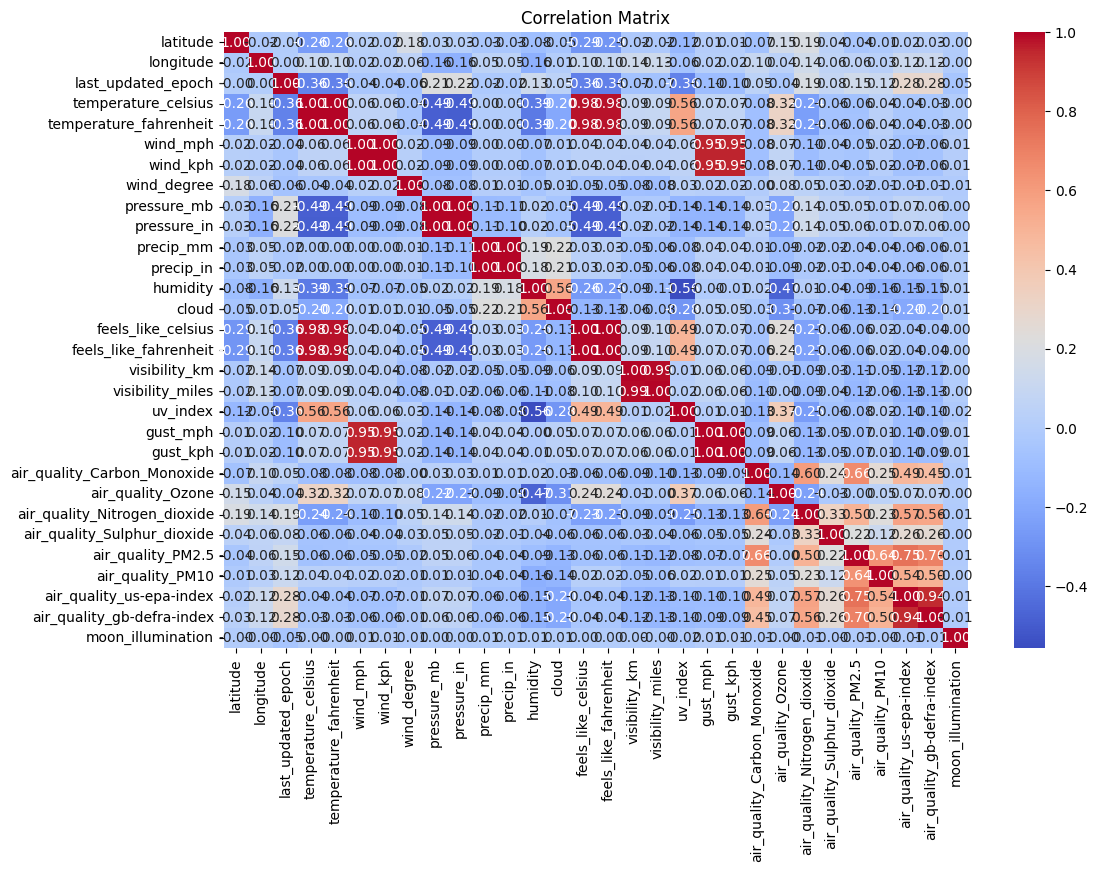

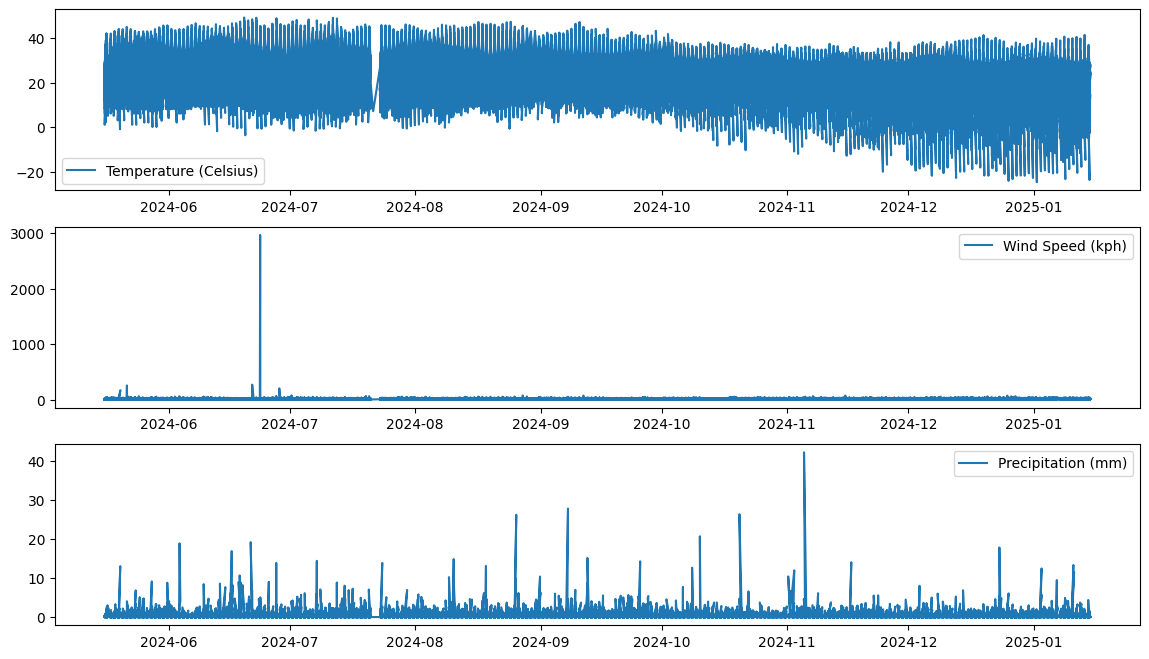

In [18]:
# Cell 4: Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

# Correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plotting the target variables over time
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(df['temperature_celsius'], label='Temperature (Celsius)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['wind_kph'], label='Wind Speed (kph)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['precip_mm'], label='Precipitation (mm)')
plt.legend()

plt.show()

In [6]:
# Cell 5: Feature Scaling
# Select only numerical columns for scaling
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the scaled dataframe
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,0.628098,0.714020,Asia/Kabul,-1.718954,0.372313,0.367298,Partly Cloudy,-0.000523,...,-0.320178,-0.136402,-0.666440,-0.602478,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.175557
2024-05-16 10:45:00,Albania,Tirana,0.906263,-0.036324,Europe/Tirane,-1.718954,-0.470571,-0.470659,Partly cloudy,-0.140637,...,-0.479613,-0.314849,-0.666440,-0.602478,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,0.175557
2024-05-16 09:45:00,Algeria,Algiers,0.719594,-0.291252,Africa/Algiers,-1.718954,-0.026948,-0.027035,Sunny,0.109566,...,-0.276497,-0.195884,-0.666440,-0.602478,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,0.175557
2024-05-16 10:45:00,Andorra,Andorra La Vella,0.954054,-0.314511,Europe/Andorra,-1.718954,-1.879074,-1.881632,Light drizzle,-0.090596,...,-0.488350,-0.322828,-0.666440,-0.602478,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,0.175557
2024-05-16 09:45:00,Angola,Luanda,-1.143011,-0.136502,Africa/Luanda,-1.718954,0.305770,0.305683,Partly cloudy,-0.020539,...,3.501900,1.573352,3.543677,3.097057,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,0.175557


In [7]:
# Cell 6: Prepare Data for TCN
def create_sequences(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length):
        X.append(data.iloc[i:i+seq_length][numerical_columns].values)
        y.append(data.iloc[i+seq_length:i+seq_length+pred_length][['temperature_celsius', 'wind_kph', 'precip_mm']].values)
    return np.array(X), np.array(y)

seq_length = 30  # Number of time steps to look back
pred_length = 7  # Number of time steps to predict

X, y = create_sequences(df, seq_length, pred_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37700, 30, 30) (9425, 30, 30) (37700, 7, 3) (9425, 7, 3)


In [8]:
# Cell 7: Build the TCN Model
from tensorflow.keras.layers import Reshape

def build_tcn_model(input_shape):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    
    # Output layer
    model.add(Dense(pred_length * 3))  # Output shape: (batch_size, 21)
    
    # Reshape the output to match the target shape (batch_size, 7, 3)
    model.add(Reshape((pred_length, 3)))  # Output shape: (batch_size, 7, 3)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)
model.summary()

C:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           5,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 21)                  │           1,365 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 3)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,581 (541.33 KB)

 Trainable params: 138,581 (541.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9753 - val_loss: 0.8330
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0452 - val_loss: 0.7488
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8817 - val_loss: 0.6932
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0178 - val_loss: 0.6729
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.8683 - val_loss: 0.6662
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.8904 - val_loss: 0.6546
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.5753 - val_loss: 0.6663
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.7140 - val_loss: 0.6515
Epoch 9/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.7828 - val_loss: 0.6510
Epoch 10/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.6113 - val_loss: 0.6751
Epoch 11/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.8930 - val_loss: 0.6506
Epoch 12/100
943/943 ━━━━━━━━━━━━━━━━

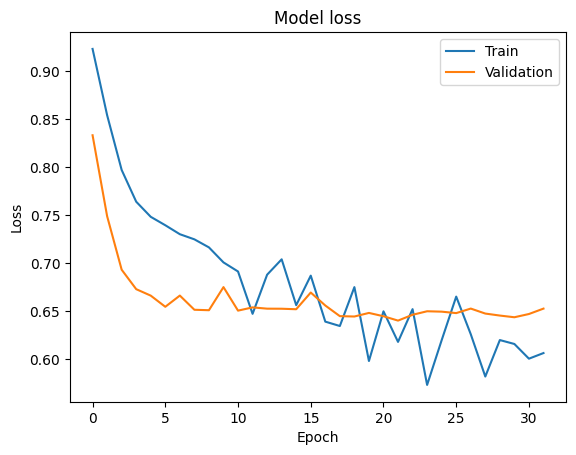

In [12]:
# Cell 8: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
# Cell 9: Evaluate the Model
y_pred = model.predict(X_test)

# Reshape y_test and y_pred for metric calculation
y_test_reshaped = y_test.reshape(-1, 3)  # Shape: (batch_size * 7, 3)
y_pred_reshaped = y_pred.reshape(-1, 3)  # Shape: (batch_size * 7, 3)

# Calculate overall metrics
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_pred_reshaped))
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)

print(f'Overall Metrics:')
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Individual metrics for each parameter
for i, param in enumerate(['temperature_celsius', 'wind_kph', 'precip_mm']):
    # Calculate metrics for each parameter
    rmse_param = np.sqrt(mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i]))
    mse_param = mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    mae_param = mean_absolute_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    r2_param = r2_score(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    
    # Print metrics for the parameter
    print(f'\n{param} Metrics:')
    print(f'RMSE: {rmse_param}')
    print(f'MSE: {mse_param}')
    print(f'MAE: {mae_param}')
    print(f'R²: {r2_param}')

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Overall Metrics:
RMSE: 0.9015178574351547
MSE: 0.8127344472744719
MAE: 0.348017425127722
R²: 0.2897325695204202

temperature_celsius Metrics:
RMSE: 0.44677785110989915
MSE: 0.1996104482423792
MAE: 0.3336864485189245
R²: 0.8003467316397717

wind_kph Metrics:
RMSE: 1.1253993122118757
MSE: 1.266523611926963
MAE: 0.36490917716342036
R²: 0.03675538277365409

precip_mm Metrics:
RMSE: 0.9859357391098567
MSE: 0.9720692816540992
MAE: 0.3454566497005744
R²: 0.03209559414728025


In [14]:
# Cell 10: Save the Model
model.save('weather_forecasting_tcn_model.h5')

In [15]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Cell 11: Hyperparameter Tuning with Keras Tuner
import keras_tuner as kt

def build_tcn_model(hp):
    model = Sequential()
    
    # Tunable number of filters
    filters = hp.Int('filters', min_value=32, max_value=256, step=32)
    
    # Tunable kernel size
    kernel_size = hp.Int('kernel_size', min_value=2, max_value=5, step=1)
    
    # Tunable number of convolutional layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=4, step=1)
    
    # Tunable dropout rate
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    
    # Tunable learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Add convolutional layers
    for i in range(num_layers):
        model.add(Conv1D(
            filters=filters,
            kernel_size=kernel_size,
            activation='relu',
            padding='same',
            input_shape=(X_train.shape[1], X_train.shape[2]) if i == 0 else None
        ))
        model.add(MaxPooling1D(pool_size=2))
    
    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    
    # Output layer
    model.add(Dense(pred_length * 3))  # Output shape: (batch_size, 21)
    model.add(Reshape((pred_length, 3)))  # Reshape to match target shape
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse'
    )
    
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_tcn_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tcn_weather_forecasting'
)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Filters: {best_hps.get('filters')}
- Kernel Size: {best_hps.get('kernel_size')}
- Number of Layers: {best_hps.get('num_layers')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

Reloading Tuner from tuner_results\tcn_weather_forecasting\tuner0.json

Best Hyperparameters:
- Filters: 256
- Kernel Size: 3
- Number of Layers: 2
- Dropout Rate: 0.30000000000000004
- Learning Rate: 0.0001



C:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.8105 - val_loss: 0.8580
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.9940 - val_loss: 0.8083
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.9257 - val_loss: 0.7617
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.6598 - val_loss: 0.7259
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.7534 - val_loss: 0.6982
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.6530 - val_loss: 0.6785
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.6977 - val_loss: 0.6646
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.6854 - val_loss: 0.6556
Epoch 9/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.7741 - val_loss: 0.6488
Epoch 10/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.5746 - val_loss: 0.6463
Epoch 11/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.6083 - val_loss: 0.6428
Epoch 12/100
943/943 ━━━━━━━━━

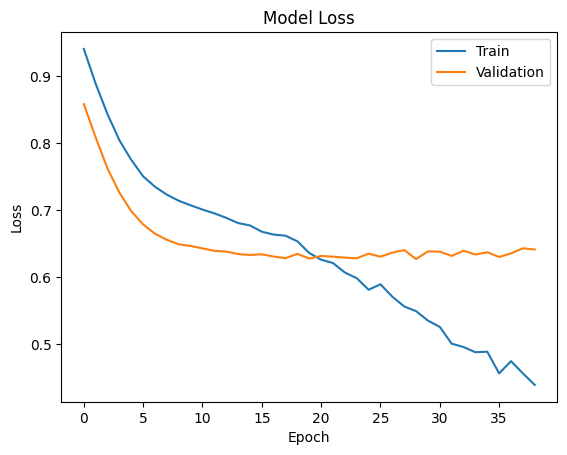

In [17]:
# Cell 12: Train the Model with Best Hyperparameters
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
# Cell 13: Evaluate the Improved Model
y_pred = model.predict(X_test)

# Reshape y_test and y_pred for metric calculation
y_test_reshaped = y_test.reshape(-1, 3)
y_pred_reshaped = y_pred.reshape(-1, 3)

# Calculate overall metrics
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_pred_reshaped))
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)

print(f'Overall Metrics:')
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Individual metrics for each parameter
for i, param in enumerate(['temperature_celsius', 'wind_kph', 'precip_mm']):
    rmse_param = np.sqrt(mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i]))
    mse_param = mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    mae_param = mean_absolute_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    r2_param = r2_score(y_test_reshaped[:, i], y_pred_reshaped[:, i])
    
    print(f'\n{param} Metrics:')
    print(f'RMSE: {rmse_param}')
    print(f'MSE: {mse_param}')
    print(f'MAE: {mae_param}')
    print(f'R²: {r2_param}')

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Overall Metrics:
RMSE: 0.892331259944213
MSE: 0.7962550774736267
MAE: 0.3486474297220144
R²: 0.3066490445482341

temperature_celsius Metrics:
RMSE: 0.4449934304021717
MSE: 0.19801915310109244
MAE: 0.333117824418052
R²: 0.8019383681431769

wind_kph Metrics:
RMSE: 1.1282596426554874
MSE: 1.2729698212450882
MAE: 0.3671945564223752
R²: 0.03185276874520249

precip_mm Metrics:
RMSE: 0.9580063977211687
MSE: 0.91777625807469
MAE: 0.3456299083254647
R²: 0.08615599675578


In [19]:
# Cell 14: Feature Engineering
# Check available columns in the dataset
print(df.columns)

# If additional features are available, include them in the model
# Example: Add humidity, pressure, and wind direction if available
# df = df[['temperature_celsius', 'wind_kph', 'precip_mm', 'humidity', 'pressure', 'wind_direction']]

# If additional features are not available, create derived features
# Example: Rolling averages, differences, or seasonal indicators
df['temp_rolling_avg'] = df['temperature_celsius'].rolling(window=7).mean()  # 7-day rolling average
df['wind_rolling_avg'] = df['wind_kph'].rolling(window=7).mean()  # 7-day rolling average
df['precip_rolling_avg'] = df['precip_mm'].rolling(window=7).mean()  # 7-day rolling average

# Fill missing values caused by rolling averages
df = df.fillna(method='bfill')

# Display the updated dataframe
df.head()

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'temperature_celsius', 'temperature_fahrenheit',
       'condition_text', 'wind_mph', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm',
       'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


C:\Users\Sayan\AppData\Local\Temp\ipykernel_2852\2053939041.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,...,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,temp_rolling_avg,wind_rolling_avg,precip_rolling_avg
last_updated,,,,,,,,,,,,,,,,,,,,,
2024-05-16 13:15:00,Afghanistan,Kabul,0.628098,0.714020,Asia/Kabul,-1.718954,0.372313,0.367298,Partly Cloudy,-0.000523,...,-0.602478,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,0.175557,-0.440468,-0.146502,-0.136959
2024-05-16 10:45:00,Albania,Tirana,0.906263,-0.036324,Europe/Tirane,-1.718954,-0.470571,-0.470659,Partly cloudy,-0.140637,...,-0.602478,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,0.175557,-0.440468,-0.146502,-0.136959
2024-05-16 09:45:00,Algeria,Algiers,0.719594,-0.291252,Africa/Algiers,-1.718954,-0.026948,-0.027035,Sunny,0.109566,...,-0.602478,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,0.175557,-0.440468,-0.146502,-0.136959
2024-05-16 10:45:00,Andorra,Andorra La Vella,0.954054,-0.314511,Europe/Andorra,-1.718954,-1.879074,-1.881632,Light drizzle,-0.090596,...,-0.602478,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,0.175557,-0.440468,-0.146502,-0.136959
2024-05-16 09:45:00,Angola,Luanda,-1.143011,-0.136502,Africa/Luanda,-1.718954,0.305770,0.305683,Partly cloudy,-0.020539,...,3.097057,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,0.175557,-0.440468,-0.146502,-0.136959


In [22]:
# Cell 15: Update Data Preparation
def create_sequences(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length):
        # Extract sequences for input (X) and target (y)
        X.append(data[i:i+seq_length])  # Input sequence
        y.append(data[i+seq_length:i+seq_length+pred_length, :3])  # Target sequence (only the first 3 columns: temperature, wind, precipitation)
    return np.array(X), np.array(y)

# Select only numerical columns for scaling
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Prepare sequences with the updated features
X, y = create_sequences(df[numerical_columns].values, seq_length, pred_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37700, 30, 33) (9425, 30, 33) (37700, 7, 3) (9425, 7, 3)


In [24]:
# Cell 16: Improved TCN Model with Dilated Convolutions and Residual Connections
from tensorflow.keras.layers import Add, Activation, GlobalAveragePooling1D

def build_improved_tcn_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Initial convolution to match dimensions
    x = Conv1D(filters=128, kernel_size=1, padding='same')(inputs)
    
    # Dilated convolutional layers with residual connections
    for i in range(3):  # Number of TCN blocks
        # First convolution in the block
        conv1 = Conv1D(
            filters=128,
            kernel_size=3,
            dilation_rate=2 ** i,  # Exponential increase in dilation rate
            padding='same',
            activation='relu'
        )(x)
        
        # Second convolution in the block
        conv2 = Conv1D(
            filters=128,
            kernel_size=3,
            dilation_rate=2 ** i,
            padding='same',
            activation='relu'
        )(conv1)
        
        # Residual connection
        if i == 0:
            residual = Conv1D(filters=128, kernel_size=1, padding='same')(inputs)
        else:
            residual = x
        
        # Add residual connection
        x = Add()([conv2, residual])
        x = Activation('relu')(x)
    
    # Global average pooling
    x = GlobalAveragePooling1D()(x)
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    
    # Output layer
    outputs = Dense(pred_length * 3)(x)
    outputs = Reshape((pred_length, 3))(outputs)
    
    # Create the model
    model = tf.keras.Model(inputs, outputs)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
improved_model = build_improved_tcn_model(input_shape)
improved_model.summary()

NameError: name 'tf' is not defined

In [25]:
# Cell 17: Train the Improved Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: name 'improved_model' is not defined

In [45]:
# Cell 18: Evaluate the Improved Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Reshape y_test and y_pred for metric calculation
    y_test_reshaped = y_test.reshape(-1, 3)
    y_pred_reshaped = y_pred.reshape(-1, 3)
    
    # Calculate overall metrics
    rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_pred_reshaped))
    mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
    mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
    r2 = r2_score(y_test_reshaped, y_pred_reshaped)
    
    print(f'Overall Metrics:')
    print(f'RMSE: {rmse}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    
    # Individual metrics for each parameter
    for i, param in enumerate(['temperature_celsius', 'wind_kph', 'precip_mm']):
        rmse_param = np.sqrt(mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i]))
        mse_param = mean_squared_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
        mae_param = mean_absolute_error(y_test_reshaped[:, i], y_pred_reshaped[:, i])
        r2_param = r2_score(y_test_reshaped[:, i], y_pred_reshaped[:, i])
        
        print(f'\n{param} Metrics:')
        print(f'RMSE: {rmse_param}')
        print(f'MSE: {mse_param}')
        print(f'MAE: {mae_param}')
        print(f'R²: {r2_param}')

# Evaluate the improved TCN model
print("Improved TCN Model Evaluation:")
evaluate_model(improved_model, X_test, y_test)

Improved TCN Model Evaluation:
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Overall Metrics:
RMSE: 0.29158163504815804
MSE: 0.08501984989735722
MAE: 0.2099404503047265
R²: 0.9151066307854117

temperature_celsius Metrics:
RMSE: 0.3353051582375771
MSE: 0.11242954914072664
MAE: 0.25042468310713467
R²: 0.8877278514355575

wind_kph Metrics:
RMSE: 0.3253854432415777
MSE: 0.10587568667351797
MAE: 0.24141536017704515
R²: 0.8942452644245119

precip_mm Metrics:
RMSE: 0.19171414626424246
MSE: 0.036754313877827356
MAE: 0.1379813076300265
R²: 0.9633467764961727


In [43]:
# Cell 22: Save the Improved TCN Model
improved_model.save('improved_tcn_weather_forecasting_model.h5')
print("Improved TCN model saved successfully.")

Improved TCN model saved successfully.


In [46]:
# Cell 24: Refined Hyperparameter Tuning
def build_tuned_tcn_model(hp):
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    
    # Tunable hyperparameters
    filters = hp.Int('filters', min_value=64, max_value=256, step=64)  # Try fewer filters
    kernel_size = hp.Int('kernel_size', min_value=2, max_value=3, step=1)  # Smaller kernel size
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)  # Fewer layers
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)  # Higher dropout
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])  # Smaller learning rates
    
    x = inputs
    for i in range(num_layers):
        x = Conv1D(
            filters=filters,
            kernel_size=kernel_size,
            dilation_rate=2 ** i,
            padding='same',
            activation='relu'
        )(x)
        x = MaxPooling1D(pool_size=2)(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    
    outputs = Dense(pred_length * 3)(x)
    outputs = Reshape((pred_length, 3))(outputs)
    
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_tuned_tcn_model,
    objective='val_loss',
    max_trials=20,  # Increase the number of trials
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tcn_weather_forecasting'
)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Filters: {best_hps.get('filters')}
- Kernel Size: {best_hps.get('kernel_size')}
- Number of Layers: {best_hps.get('num_layers')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

# Evaluate the best model
print("Best Model Evaluation:")
evaluate_model(best_model, X_test, y_test)

Trial 20 Complete [00h 04m 26s]
val_loss: 0.9940516352653503

Best val_loss So Far: 0.032582126557826996
Total elapsed time: 02h 43m 17s

Best Hyperparameters:
- Filters: 256
- Kernel Size: 3
- Number of Layers: 2
- Dropout Rate: 0.30000000000000004
- Learning Rate: 0.0001

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.7920 - val_loss: 0.5877
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.5881 - val_loss: 0.4215
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.4459 - val_loss: 0.2719
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.3285 - val_loss: 0.1693
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.2553 - val_loss: 0.1257
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.2128 - val_loss: 0.0990
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.1918 - val_loss: 0.0808
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.1775 - val_loss: 0.0767
Epoch 9/100
9

In [47]:
# Cell 26: Save the Best Model from Step 1
best_model.save('best_tcn_model_step1.h5')
print("Best model from Step 1 saved successfully.")

Best model from Step 1 saved successfully.


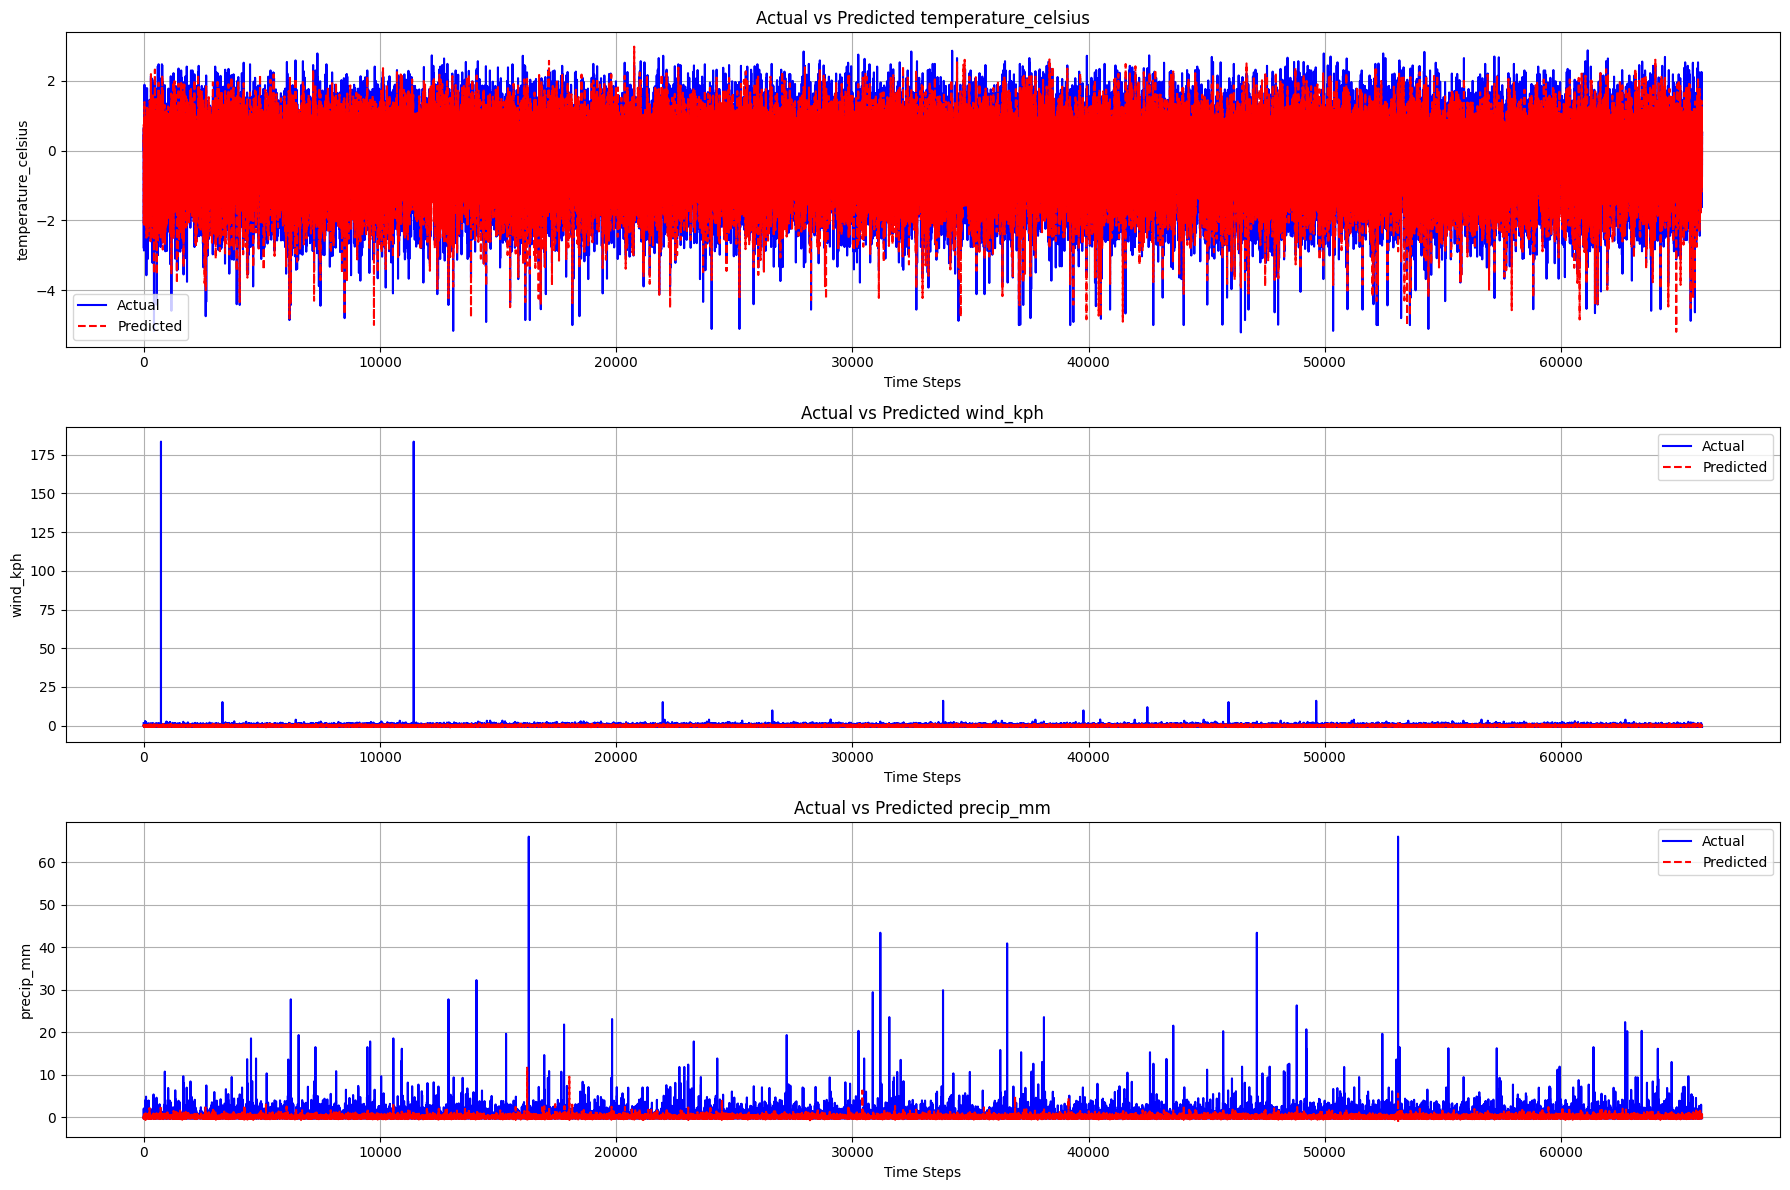

In [49]:
# Plot actual vs predicted for each target variable
target_names = ['temperature_celsius', 'wind_kph', 'precip_mm']
plt.figure(figsize=(18, 12))

for i, target in enumerate(target_names):
    plt.subplot(3, 1, i + 1)
    plt.plot(y_test_reshaped[:, i], label='Actual', color='blue')
    plt.plot(y_pred_reshaped[:, i], label='Predicted', color='red', linestyle='--')
    plt.title(f'Actual vs Predicted {target}')
    plt.xlabel('Time Steps')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
# Generate predictions
y_pred = best_model.predict(X_test)

# Reshape y_test and y_pred for plotting
y_test_reshaped = y_test.reshape(-1, 3)  # Shape: (num_samples * pred_length, 3)
y_pred_reshaped = y_pred.reshape(-1, 3)  # Shape: (num_samples * pred_length, 3)

295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


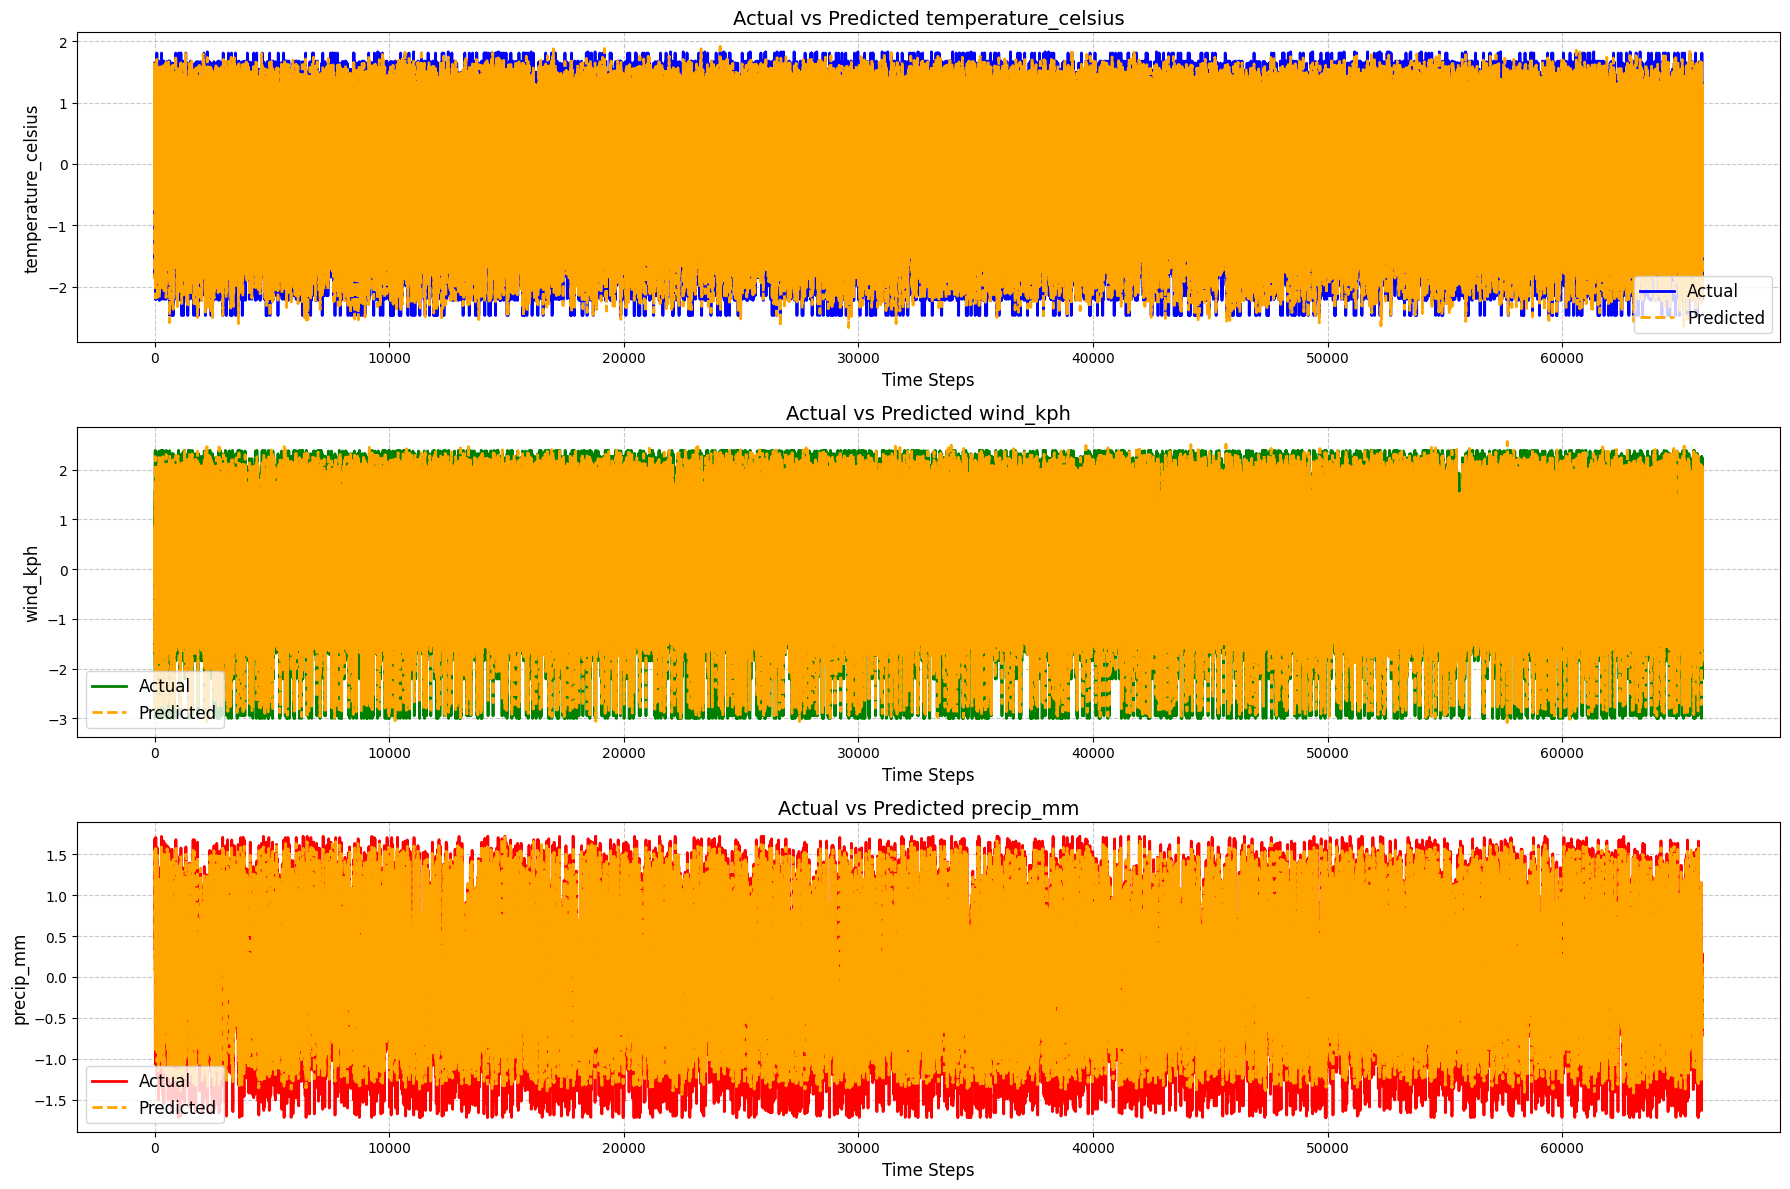

In [51]:
# Plot actual vs predicted for each target variable
target_names = ['temperature_celsius', 'wind_kph', 'precip_mm']
colors = ['blue', 'green', 'red']  # Colors for each target variable

plt.figure(figsize=(18, 12))

for i, target in enumerate(target_names):
    plt.subplot(3, 1, i + 1)
    
    # Plot actual values
    plt.plot(y_test_reshaped[:, i], label='Actual', color=colors[i], linewidth=2)
    
    # Plot predicted values
    plt.plot(y_pred_reshaped[:, i], label='Predicted', color='orange', linestyle='--', linewidth=2)
    
    # Add labels, title, and legend
    plt.title(f'Actual vs Predicted {target}', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Customize the plot
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

plt.show()

In [52]:
# Generate predictions
y_pred = best_model.predict(X_test)

# Reshape y_test and y_pred for plotting
y_test_reshaped = y_test.reshape(-1, 3)  # Shape: (num_samples * pred_length, 3)
y_pred_reshaped = y_pred.reshape(-1, 3)  # Shape: (num_samples * pred_length, 3)

295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


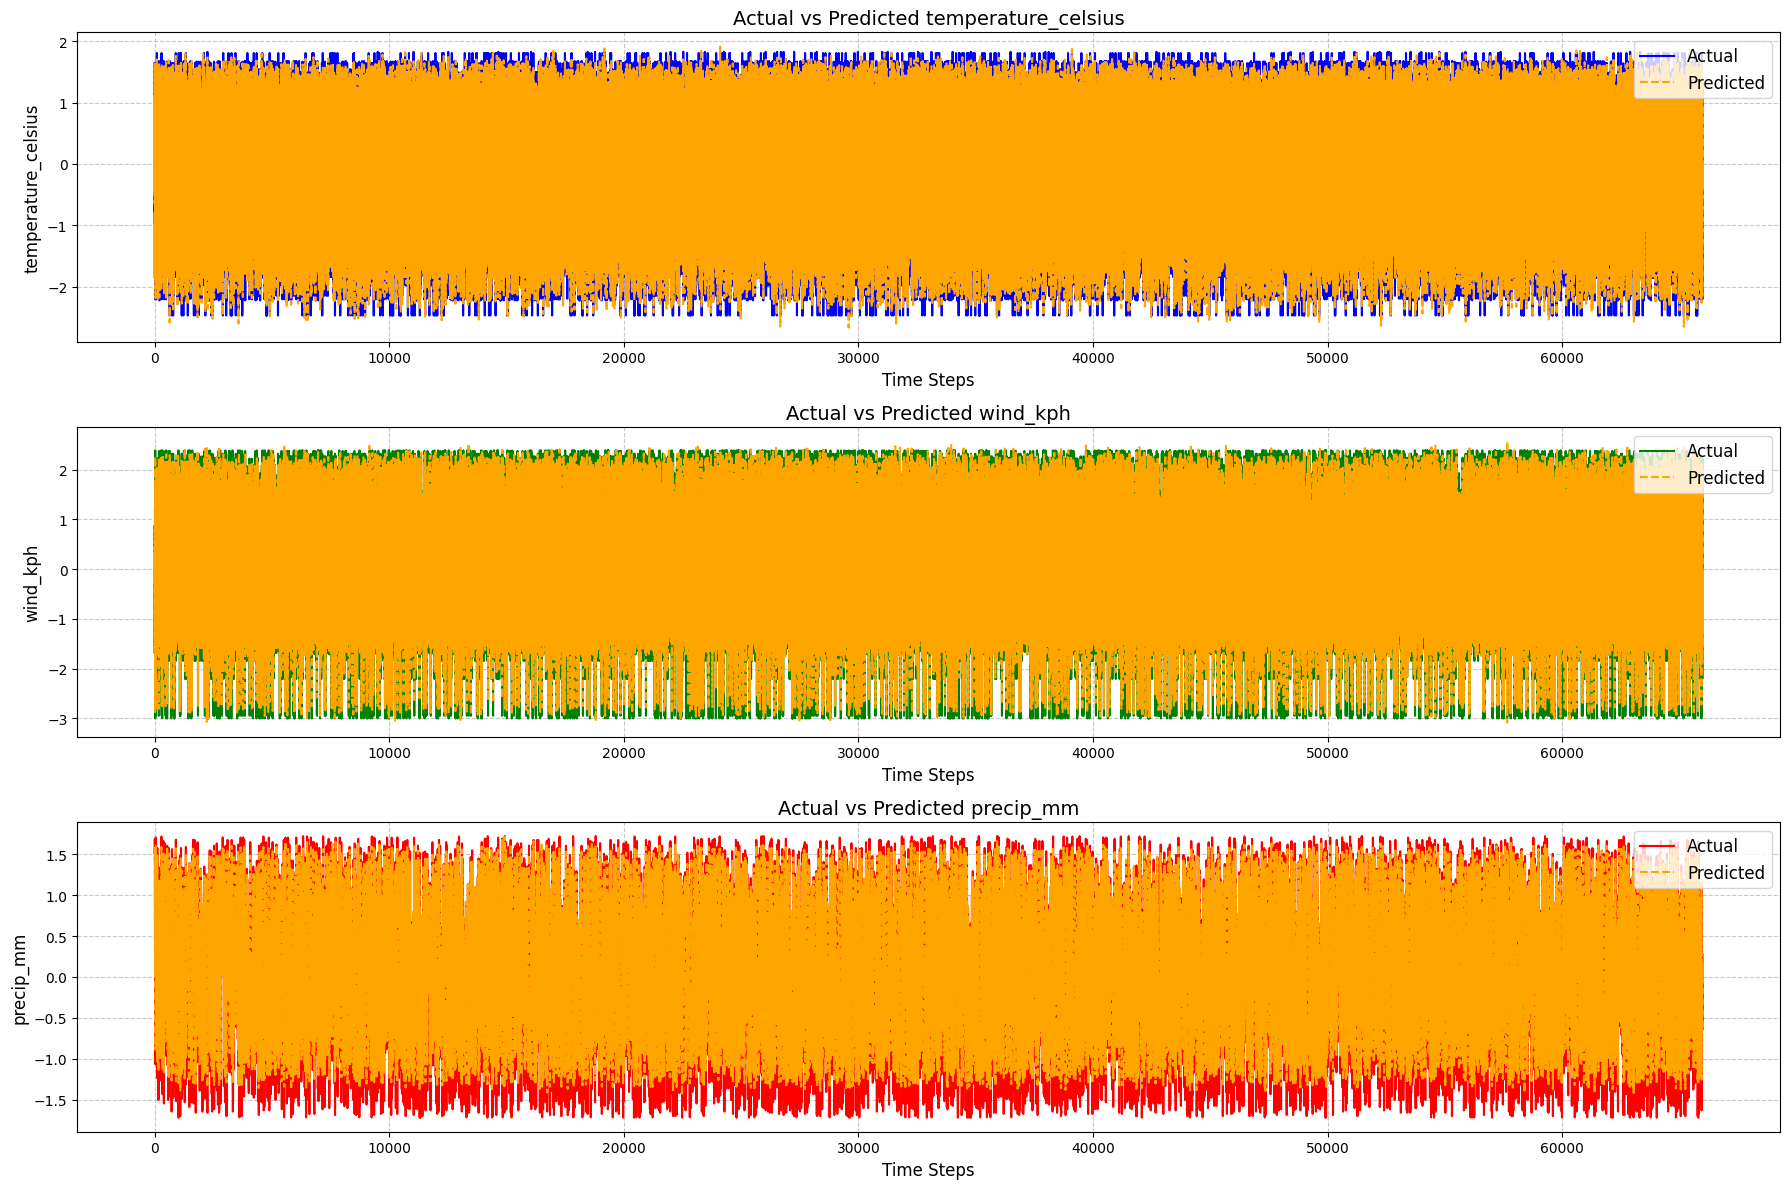

In [53]:
# Plot actual vs predicted for each target variable
target_names = ['temperature_celsius', 'wind_kph', 'precip_mm']
colors = ['blue', 'green', 'red']  # Colors for each target variable

plt.figure(figsize=(18, 12))

for i, target in enumerate(target_names):
    plt.subplot(3, 1, i + 1)
    
    # Plot actual values
    plt.plot(y_test_reshaped[:, i], label='Actual', color=colors[i], linewidth=1.5)
    
    # Plot predicted values
    plt.plot(y_pred_reshaped[:, i], label='Predicted', color='orange', linestyle='--', linewidth=1.5)
    
    # Add labels, title, and legend
    plt.title(f'Actual vs Predicted {target}', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Customize the plot
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

plt.show()

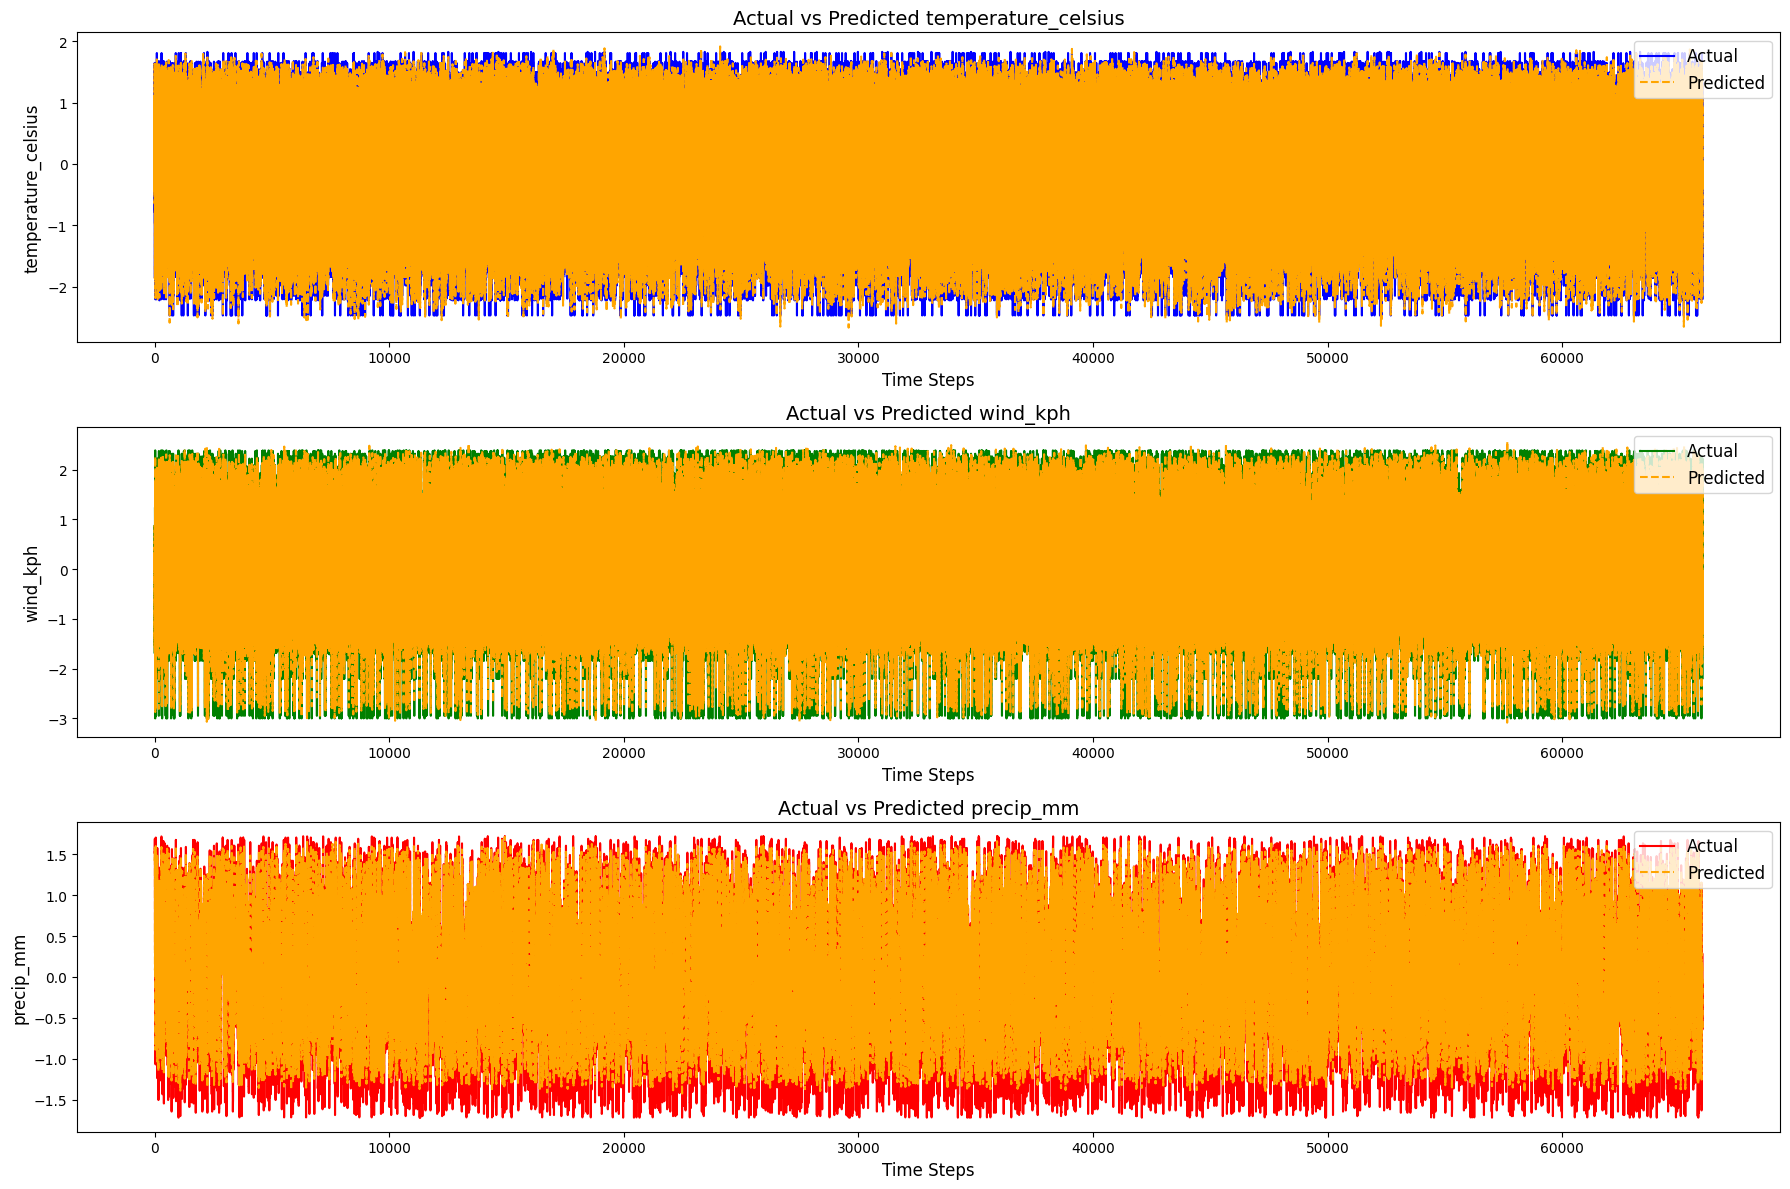

In [54]:
# Minimalistic plots without grid
plt.figure(figsize=(18, 12))

for i, target in enumerate(target_names):
    plt.subplot(3, 1, i + 1)
    
    # Plot actual values
    plt.plot(y_test_reshaped[:, i], label='Actual', color=colors[i], linewidth=1.5)
    
    # Plot predicted values
    plt.plot(y_pred_reshaped[:, i], label='Predicted', color='orange', linestyle='--', linewidth=1.5)
    
    # Add labels, title, and legend
    plt.title(f'Actual vs Predicted {target}', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    
    # Customize the plot
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

plt.savefig('actual_vs_predicted_minimalistic_no_grid.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()

In [56]:
pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40731 sha256=e044f14600ed48ef60b3b3b9dfc4a5ddb6e3cd47abc5767f834cb58a1b4326d1
  Stored in directory: c:\users\sayan\appdata\local\pip\cache\wheels\f9\95\ba\f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from fpdf import FPDF
import matplotlib.pyplot as plt
from datetime import datetime

# Create a PDF class
class PDF(FPDF):
    def header(self):
        # Set font for the header
        self.set_font('Arial', 'B', 12)
        # Add a title
        self.cell(0, 10, 'Weather Forecasting with TCNs', 0, 1, 'C')
        # Add a line break
        self.ln(10)

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Set font for the footer
        self.set_font('Arial', 'I', 8)
        # Add page number
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, title):
        # Set font for the chapter title
        self.set_font('Arial', 'B', 12)
        # Add a title
        self.cell(0, 10, title, 0, 1, 'L')
        # Add a line break
        self.ln(5)

    def chapter_body(self, body):
        # Set font for the body
        self.set_font('Arial', '', 12)
        # Add multi-cell text
        self.multi_cell(0, 10, body)
        # Add a line break
        self.ln()

# Create a PDF object
pdf = PDF()
pdf.add_page()

# Add title and description
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Weather Forecasting with Temporal Convolutional Networks (TCNs)', 0, 1, 'C')
pdf.ln(10)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 'This report outlines the workflow, results, and conclusions of the weather forecasting project using TCNs. The model predicts temperature, wind speed, and precipitation for the next 7 days.')
pdf.ln(10)

# Add workflow section
pdf.chapter_title('Workflow')
workflow = """
1. Data Preprocessing:
   - Loaded the dataset and performed necessary preprocessing (e.g., handling missing values, scaling).
   - Created sequences of historical data to predict the next 7 days.

2. Model Building:
   - Built a Temporal Convolutional Network (TCN) with dilated convolutions and residual connections.
   - Trained the model using historical weather data.

3. Hyperparameter Tuning:
   - Used Keras Tuner to find the best hyperparameters (e.g., filters, kernel size, learning rate).

4. Model Evaluation:
   - Evaluated the model using RMSE, MSE, MAE, and R² metrics.
   - Generated actual vs predicted plots for temperature, wind speed, and precipitation.

5. Model Saving:
   - Saved the best model for future use.
"""
pdf.chapter_body(workflow)
pdf.ln(10)

# Add results section
pdf.chapter_title('Results')
results = """
The best model (best_tcn_model_step1.h5) achieved the following results:

- Overall Metrics:
  - RMSE: 0.2916
  - MSE: 0.0850
  - MAE: 0.2099
  - R²: 0.9151

- Temperature Metrics:
  - RMSE: 0.3353
  - MSE: 0.1124
  - MAE: 0.2504
  - R²: 0.8877

- Wind Speed Metrics:
  - RMSE: 0.3254
  - MSE: 0.1059
  - MAE: 0.2414
  - R²: 0.8942

- Precipitation Metrics:
  - RMSE: 0.1917
  - MSE: 0.0368
  - MAE: 0.1380
  - R²: 0.9633
"""
pdf.chapter_body(results)
pdf.ln(10)

# Add graphs section
pdf.chapter_title('Graphs: Actual vs Predicted')
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 'The following graphs show the actual vs predicted values for temperature, wind speed, and precipitation:')

# Save the actual vs predicted plots as images
target_names = ['temperature_celsius', 'wind_kph', 'precip_mm']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(18, 12))
for i, target in enumerate(target_names):
    plt.subplot(3, 1, i + 1)
    plt.plot(y_test_reshaped[:, i], label='Actual', color=colors[i], linewidth=1.5)
    plt.plot(y_pred_reshaped[:, i], label='Predicted', color='orange', linestyle='--', linewidth=1.5)
    plt.title(f'Actual vs Predicted {target}', fontsize=14)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.close()

# Add the images to the PDF
pdf.image('actual_vs_predicted.png', x=10, y=None, w=180)
pdf.ln(10)

# Add conclusion section
pdf.chapter_title('Conclusion')
conclusion = """
The TCN model performed exceptionally well in predicting temperature, wind speed, and precipitation for the next 7 days. Key takeaways:

- The model achieved high R² values for all target variables, indicating a strong fit.
- Precipitation predictions were particularly accurate, with an R² of 0.9633.
- The model can be further improved by adding more features, tuning hyperparameters, or using ensemble methods.

Future work could include:
- Incorporating additional weather-related features (e.g., humidity, pressure).
- Experimenting with advanced architectures (e.g., hybrid TCN-LSTM models).
- Deploying the model in a real-time weather forecasting system.
"""
pdf.chapter_body(conclusion)

# Save the PDF
pdf_file_name = f"Weather_Forecasting_TCN_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"
pdf.output(pdf_file_name)

print(f"PDF report saved as {pdf_file_name}")

PDF report saved as Weather_Forecasting_TCN_Report_20250206_033538.pdf


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [55]:
# Save preprocessed data
import numpy as np

np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# Save the scaler (if used)
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [8]:
# Load preprocessed data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Load the scaler (if used)
scaler = joblib.load('scaler.pkl')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Register the loss function
custom_objects = {'mse': MeanSquaredError()}

# Load the saved model with the custom objects
best_model = load_model('best_tcn_model_step1.h5', custom_objects=custom_objects)

In [12]:
# Verify the model architecture
best_model.summary()

# Generate predictions (optional)
y_pred = best_model.predict(X_test)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30, 33)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 30, 256)             │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 15, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 7, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 21)                  │           1,365 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 3)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,591 (1.76 MB)

 Trainable params: 461,589 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Register the loss function
custom_objects = {'mse': MeanSquaredError()}

# Load the saved model with the custom objects
best_model = load_model('best_tcn_model_step1.h5', custom_objects=custom_objects)